In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
import json

In [5]:
with open('/home/devel/tmp', 'r', encoding='utf8') as _fd:
    s =  _fd.read()


In [6]:
import os

In [7]:
transforms = {}

In [8]:
transforms['t_r1_c'] = [float(x) for x in ' '.join(s.split(os.linesep)[1].split(' ')[2:])[1:-1].split(',')]

In [9]:
transforms['t_r2_c'] = [float(x) for x in ' '.join(s.split(os.linesep)[7].split(' ')[2:])[1:-1].split(',')]

In [10]:
transforms['q_r1_c'] = [float(x) for x in ' '.join(s.split(os.linesep)[2].split(' ')[4:])[1:-1].split(',')]

In [11]:
transforms['q_r2_c'] = [float(x) for x in ' '.join(s.split(os.linesep)[8].split(' ')[4:])[1:-1].split(',')]

In [12]:
transforms

{'t_r1_c': [0.05, 0.013, 0.075],
 't_r2_c': [-0.01, 0.013, 0.075],
 'q_r1_c': [-0.5, 0.5, -0.5, 0.5],
 'q_r2_c': [-0.5, 0.5, -0.5, 0.5]}

In [13]:
import rosbag

In [14]:
with open('/home/devel/Data/lidar_cam_calib_db_project.bag', 'rb') as _fd:
    bag = rosbag.bag.Bag(_fd)
    msg_gen = bag.read_messages(topics=['/velodyne_packets'])
    np_nsec_lidar0 = np.asarray([msg.timestamp.to_nsec() for msg in msg_gen])

In [15]:
with open('/home/devel/Data/lidar_cam_calib_db_project.bag', 'rb') as _fd:
    bag = rosbag.bag.Bag(_fd)
    msg_gen = bag.read_messages(topics=['/image_color_rect/compressed'])
    np_nsec_cam0 = np.asarray([msg.timestamp.to_nsec() for msg in msg_gen])

In [16]:
with open('/home/devel/Data/lidar_cam_calib_db_project.bag', 'rb') as _fd:
    bag = rosbag.bag.Bag(_fd)
    msg_gen = bag.read_messages(topics=['/ti_mmwave/radar_scan_pcl_1'])
    np_nsec_radar0 = np.asarray([msg.timestamp.to_nsec() for msg in msg_gen])

In [17]:
with open('/home/devel/Data/lidar_cam_calib_db_project.bag', 'rb') as _fd:
    bag = rosbag.bag.Bag(_fd)
    msg_gen = bag.read_messages(topics=['/ti_mmwave/radar_scan_pcl_2'])
    np_nsec_radar1 = np.asarray([msg.timestamp.to_nsec() for msg in msg_gen])

In [18]:
from matplotlib import pylab as plt

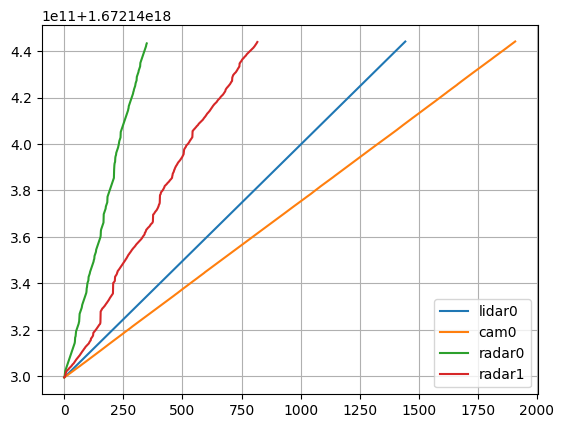

In [19]:
fig, ax = plt.subplots(1,1)
ax.plot(np_nsec_lidar0, label='lidar0')
ax.plot(np_nsec_cam0, label='cam0')
ax.plot(np_nsec_radar0, label='radar0')
ax.plot(np_nsec_radar1, label='radar1')
plt.grid()
plt.legend(loc=0)
plt.show()

In [20]:
np_ts_match_lc = np.zeros((len(np_nsec_cam0),len(np_nsec_lidar0)), np.int64)
# np_ts_match_lc = np.zeros((len(np_nsec_lidar0),len(np_nsec_cam0)), np.int64) # This is for using cam as referecne, will duplicate the lidar frame.

In [21]:
for i,tc in enumerate(np_nsec_cam0):
    for j,tl in enumerate(np_nsec_lidar0):
        np_ts_match_lc[i,j] = tc-tl
# for i,tl in enumerate(np_nsec_lidar0):
#     for j,tc in enumerate(np_nsec_cam0):
#         np_ts_match_lc[i,j] = tl-tc

In [22]:
np_ts_match_lc.shape

(1909, 1444)

In [23]:
np_ts_match_lc = np.abs(np_ts_match_lc)

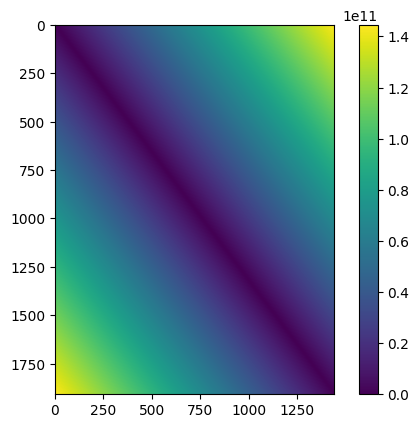

In [24]:
plt.imshow(np_ts_match_lc)
plt.colorbar()

In [25]:
np_ts_match_lc

array([[    10264188,     89957820,    189929935, ..., 144372652797,
        144472952284, 144573151623],
       [    79421487,     20800521,    120772636, ..., 144303495498,
        144403794985, 144503994324],
       [   159773520,     59551512,     40420603, ..., 144223143465,
        144323442952, 144423642291],
       ...,
       [144456477034, 144356255026, 144256282911, ...,     73560049,
            26739438,    126938777],
       [144530678092, 144430456084, 144330483969, ...,    147761107,
            47461620,     52737719],
       [144605079933, 144504857925, 144404885810, ...,    222162948,
           121863461,     21664122]])

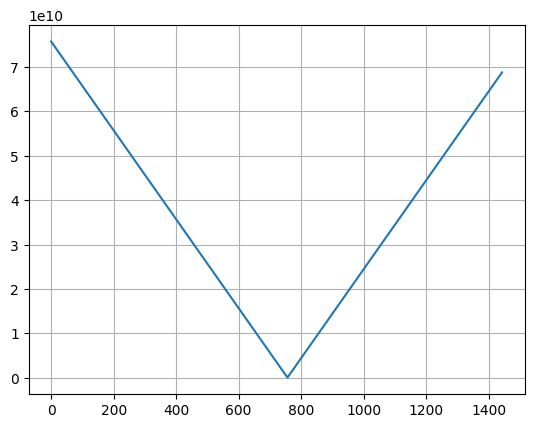

In [26]:
plt.plot(np_ts_match_lc[1000])
plt.grid()

In [27]:
cam_i = 1000
lidar_i = np.argmin(np_ts_match_lc[cam_i])
print(f'Camera frame {cam_i} has minimal dt {np_ts_match_lc[cam_i, lidar_i]} with lidar frame {lidar_i}')
# here means around the 1322th cam message has the smallest timestamp-delta of the 1000th lidar message.

Camera frame 1000 has minimal dt 26064220 with lidar frame 756


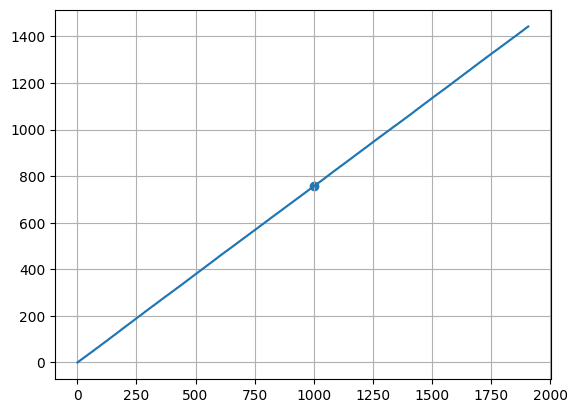

In [28]:
plt.plot(np.argmin(np_ts_match_lc, axis=1))
plt.scatter([cam_i],[lidar_i])
plt.grid()

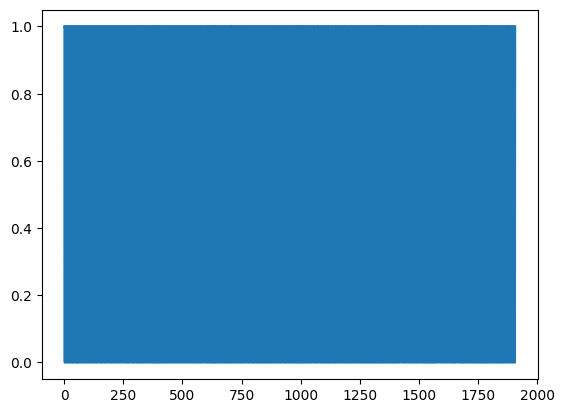

In [29]:
plt.plot(np.argmin(np_ts_match_lc, axis=1)[1:] - np.argmin(np_ts_match_lc, axis=1)[:-1])

In [30]:
np.argmin(np_ts_match_lc.T,axis=1)

array([   0,    1,    3, ..., 1905, 1906, 1908])

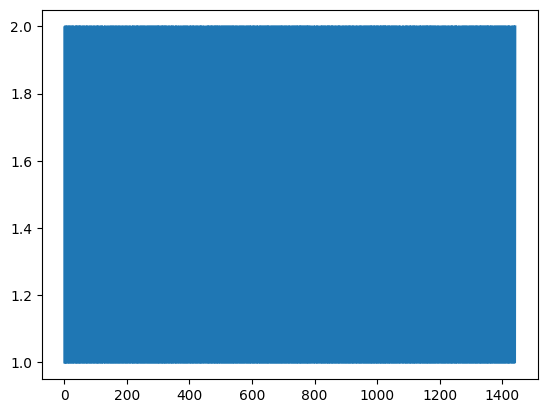

In [31]:
plt.plot(np.argmin(np_ts_match_lc.T,axis=1)[1:]-np.argmin(np_ts_match_lc.T,axis=1)[:-1])

In [32]:
import pandas as pd

In [33]:
np.arange(np_nsec_lidar0.shape[0])

array([   0,    1,    2, ..., 1441, 1442, 1443])

In [34]:
np.argmin(np_ts_match_lc.T,axis=1).shape

(1444,)

In [35]:
np.vstack([np.arange(np_nsec_lidar0.shape[0]),np.argmin(np_ts_match_lc.T,axis=1)])

array([[   0,    1,    2, ..., 1441, 1442, 1443],
       [   0,    1,    3, ..., 1905, 1906, 1908]])

In [36]:
df_seq_match_lc =\
    pd.DataFrame(dict(list(zip(['lid0','cam0'],np.vstack([np.arange(np_nsec_lidar0.shape[0]),np.argmin(np_ts_match_lc.T,axis=1)])))))
# df_seq_match_lc =\
#     pd.DataFrame(dict(list(zip(['cam0','lidar0'],np.vstack([np.arange(np_nsec_cam0.shape[0]),np.argmin(np_ts_match_lc.T,axis=1)])))))

In [37]:
df_seq_match_lc

,lid0,cam0
0,0,0
1,1,1
2,2,3
3,3,4
4,4,5
...,...,...
1439,1439,1902
1440,1440,1904
1441,1441,1905
1442,1442,1906


In [38]:
df_seq_match_lc.to_csv('./lidar0-to-cam0-seq-sync.csv', index=False)

In [39]:
df_seq_match_lc

,lid0,cam0
0,0,0
1,1,1
2,2,3
3,3,4
4,4,5
...,...,...
1439,1439,1902
1440,1440,1904
1441,1441,1905
1442,1442,1906


In [40]:
np_ts_match_lr0 = np.zeros((len(np_nsec_lidar0),len(np_nsec_radar0)), np.int64)

In [41]:
for i,tl in enumerate(np_nsec_lidar0):
    for j,tr0 in enumerate(np_nsec_radar0):
        np_ts_match_lr0[i,j] = tl-tr0

In [42]:
np_ts_match_lr0 = np.abs(np_ts_match_lr0)

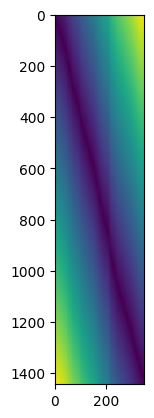

In [43]:
plt.imshow(np_ts_match_lr0)

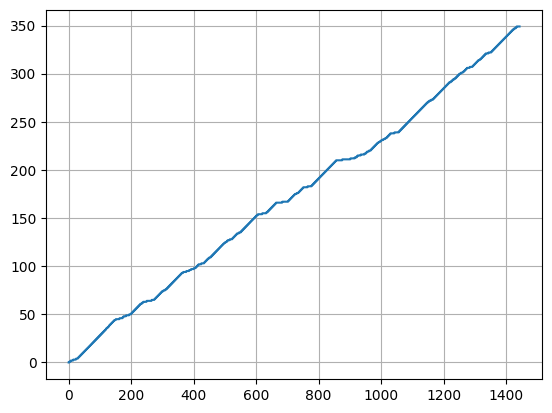

In [44]:
plt.plot(np.argmin(np_ts_match_lr0, axis=1))
plt.grid()

In [45]:
df_seq_match_r0l=\
    pd.DataFrame(dict(list(zip(['rad0','lid0'],np.vstack([np.arange(np_nsec_radar0.shape[0]),np.argmin(np_ts_match_lr0.T,axis=1)])))))

In [46]:
df_seq_match_r0l.to_csv('./radar0-to-lidar0-seq-sync.csv', index=False)

In [47]:
df_seq_match_r0l

,rad0,lid0
0,0,1
1,1,4
2,2,10
3,3,19
4,4,28
...,...,...
345,345,1420
346,346,1423
347,347,1429
348,348,1432


In [39]:
import velodyne_decoder as vd

In [40]:
from velodyne_decoder_pylib import ScanDecoder, Config

In [41]:
vd_config = vd.Config(model='VLP-32C')
vd_decoder = ScanDecoder(vd_config)

array([], dtype=float64)

In [50]:
for i,msg in enumerate(lidar_msg):
    t_lidar0 = msg.timestamp
#     print(msg.message.header)
    pcl_lidar0_msg0 = vd_decoder.decode_message(msg.message, as_pcl_structs=True)
    #for p in msg.packets:
    #    print(p)
    #    break
    break

In [56]:
type(t_lidar0.to_nsec())

int

In [55]:
t_lidar0.to_time()

1670873680.9599993

In [46]:
import pandas as pd

In [49]:
pcl_lidar0_msg0

array([(-0.32389614, 1.5544655, -0.74042726,  21.,  0, -0.0993638 ),
       (-1.1939842 , 3.8170054, -0.06980962, 105., 17, -0.0993638 ),
       (-0.7405561 , 3.55413  , -0.10565683,  21., 15, -0.0993615 ), ...,
       (-0.85817254, 3.4215827,  0.9452072 ,  44., 31,  0.00064051),
       (-0.7381672 , 3.700889 ,  0.688059  , 106., 30,  0.00064282),
       (-0.94073874, 3.7507787, -0.08998183, 103., 16,  0.00064282)],
      dtype={'names': ['x', 'y', 'z', 'intensity', 'ring', 'time'], 'formats': ['<f4', '<f4', '<f4', '<f4', '<u2', '<f4'], 'offsets': [0, 4, 8, 16, 20, 24], 'itemsize': 32})